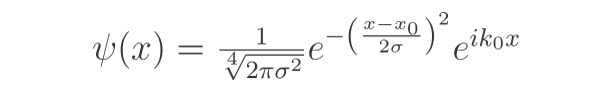

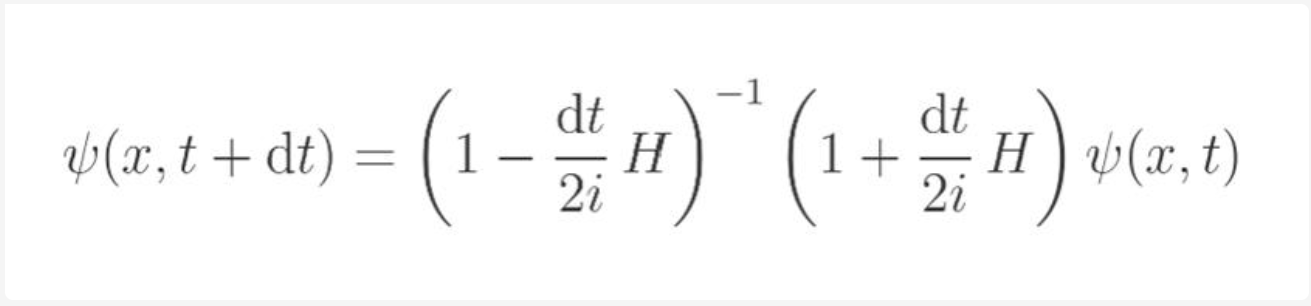

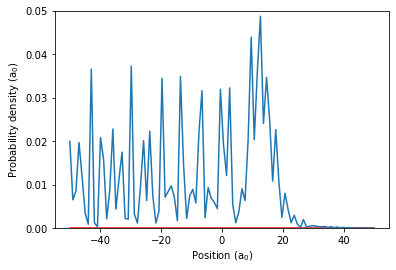

In [23]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.animation as animation





class WAVE():
    def __init__(self, sigma, x_start, x_end, dx, x0, k0, height, width,dt,t_start,t_end):
        #standard deviation
        self.sigma= sigma
        
        #x-intervals
        self.x_start=x_start
        self.x_end=x_end
        self.dx=dx
        
        #initialize coordinates
        self.x0=x0
        self.k0=k0
        
        #x-axis formation
        points = int((x_end -x_start)/dx)
        self.points = points
        self.x = np.linspace(x_start, x_end, points)
        
        # Gaussian Wave Packet
        self.psi = (1/((2*np.pi*sigma**2)**(1/4)))*np.exp(-((self.x-x0)/(2*sigma))**2)*np.exp(1j*k0*self.x)
        
        # Gaussian Wave Packet- probabilty density
        self.prob = abs(self.psi)**2
        norm = sum(self.prob)
        self.prob /= norm
        self.psi /= norm**0.5
        
        #height for barrier
        self.height= height
        #width for barrier
        self.width = width
        
        # potential array, initially set to zero
        v = np.zeros(points)
        
        # position of poetential barrier
        mid_value = int(points/2)
        end_points = int(width/dx) +  mid_value 
        v[mid_value:end_points] = height
        self.v = v
        
        # Time evolution
        
        #time-intervals
        self.t_start=t_start
        self.t_end=t_end
        self.dt=dt
        t_points =int((t_end -t_start)/dt) 
        self.t = np.linspace(t_start, t_end, t_points)
        
        laplace = np.zeros((self.points, self.points))
        
        for i in range(self.points):
            
            laplace[i,i]=2
            
            if i != 0:
                laplace[i-1,i]=-1
                laplace[i,i-1]=-1
        #Hamiltonian calculation
        H = (1/(2*((self.dx)**2)) * laplace) + self.v
        
        # np.eye - Return a 2-D array with ones on the diagonal and zeros elsewhere.
        Matrix_1 = (np.eye(np.shape(H)[0])+(dt/2j)*H)
        Matrix_2 = np.linalg.inv(np.eye(np.shape(H)[0]) - dt/2j * H)
        self.Matrix_product = np.matmul(Matrix_2,Matrix_1)
        
        
    def psi(self):
        return f"{self.psi}"
    
    def plot(self):
            plt.figure()
            x = self.x
            y = self.prob
            z = self.v
            fig, ax1 = plt.subplots()

            color = 'tab:red'
            ax1.set_xlabel('Position (m)')
            ax1.set_ylabel('Probabilty Density', color=color)
            ax1.plot(x,y, color=color)
            ax1.tick_params(axis='y', labelcolor=color)

            ax2 = ax1.twinx()  
            color = 'tab:blue'
            ax2.set_ylabel('Potential(v)', color=color)  
            ax2.plot(x, z, color=color)
            ax2.tick_params(axis='y', labelcolor=color)

            fig.tight_layout()  
            plt.show()    
                   
    def _evolve(self):
        #not really sure why this is undefined given that i defined it in class
        for i in range(1,200):       
            self.psi =  np.matmul(self.Matrix_product,self.psi)
            self.prob = abs(self.psi)**2
 
            norm = sum(self.prob)
            self.prob /= norm
            self.psi /= norm**0.5
 
        return self.prob

    def evolve(self):
        
        self.psi =  np.matmul(self.Matrix_product,self.psi)
        self.prob = abs(self.psi)**2
 
        norm = sum(self.prob)
        self.prob /= norm
        self.psi /= norm**0.5
        return self.prob
 
class Animator:
    def __init__(self, wave):
        self.time = 0.0
        self.wave = wave
        self.fig, self.ax = plt.subplots()
        plt.plot(self.wave.x, self.wave.v, color='r')
         
        self.time_text = self.ax.text(0.05, 0.95, '', horizontalalignment='left',
            verticalalignment='top', transform=self.ax.transAxes)
        self.line, = self.ax.plot(self.wave.x, self.wave._evolve())
        self.ax.set_ylim(0, 0.05)
        self.ax.set_xlabel('Position (a$_0$)')
        self.ax.set_ylabel('Probability density (a$_0$)')

    def update(self, data):
        data=self.wave.prob
        self.line.set_ydata(data)
        return self.line,
     
    def time_step(self):
        while True:
            self.time <= self.wave.t_points
            self.time_text.set_text(
                'Elapsed time: {:6.2f} fs'.format(self.time * 2.419e-2))
           
            yield self.wave_packet.evolve()
     
    def animate(self):
        self.ani = animation.FuncAnimation(
            self.fig, self.update, self.time_step, interval=5, blit=False)

# our wave class is given as a parameter to the animator classdd
wave = WAVE(sigma=0.5, x_start=-50, x_end=50, dx=1, x0=50, k0=8, height=0.7, width=0.3, dt=1, t_start=0,t_end=2)

animator = Animator(wave)
animator.animate()
plt.show()